In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

Text(0, 0.5, '$\\sigma(x)$')

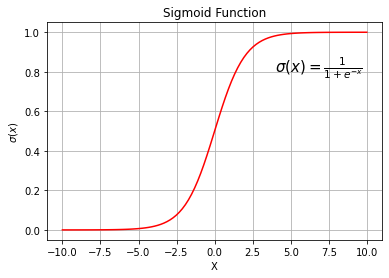

In [2]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

x = np.linspace(-10,10,100)

plt.plot(x, sigmoid(x), 'r', label='linspace(-10,10,10)')
plt.grid()
plt.title('Sigmoid Function')
plt.text(4, 0.8, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=15)
plt.xlabel('X')
plt.ylabel(r'$\sigma(x)$')

Text(0, 0.5, '$\\sigma(x)$')

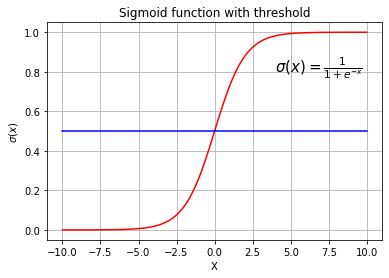

In [3]:
bx = [-10,10]
by = [.5, .5]

plt.plot(x, sigmoid(x), 'r', label='sigmoid function')
plt.plot(bx, by, 'b', label='boundary')
plt.grid()
plt.title('Sigmoid function with threshold')
plt.text(4, 0.8, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=15)
plt.xlabel('X')
plt.ylabel(r'$\sigma(x)$')

In [4]:
import sklearn
#from sklearn import datasets
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import accuracy_score

In [5]:
from pandas import Series, DataFrame

raw_data = {'x1': [-2, -1.5, -0.8, 2.1, 0.4, -0.2],
            'x2': [-0.6, -0.6, -1.9, -0.4, 0.9, 0.4],
            'target': [1, 1, 1, 0, 0, 0]}

data = DataFrame(raw_data)
print(data)

    x1   x2  target
0 -2.0 -0.6       1
1 -1.5 -0.6       1
2 -0.8 -1.9       1
3  2.1 -0.4       0
4  0.4  0.9       0
5 -0.2  0.4       0


In [6]:
data['target'].value_counts()

1    3
0    3
Name: target, dtype: int64

In [7]:
X = data.drop(data.columns[[2]], axis=1)
y = data.drop(data.columns[[0,1]], axis=1)
X.head()

,x1,x2
0,-2.0,-0.6
1,-1.5,-0.6
2,-0.8,-1.9
3,2.1,-0.4
4,0.4,0.9


In [8]:
y.head()

,target
0,1
1,1
2,1
3,0
4,0


In [9]:
def intialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w, b

In [10]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [11]:
def trainModel(w, b, X, Y, learning_rate=0.0001, no_iterations=5000):
    costs = []
    m = X.shape[0]
    #print(X.T)
    for i in range(no_iterations):
        # map the result to probability by sigmoid function
        a = sigmoid(np.dot(w,X.T))
        
        # compute the neg log-likelihood
        cost = (-1/m)*(np.sum((Y.T*np.log(a)) + ((1-Y.T)*(np.log(1-a)))))
        
        # calculate the gradient
        dw = (1/m)*(np.dot(X.T, (a-Y.T).T))
        db = (1/m)*(np.sum(a-Y.T))
        
        # update w, b
        w = w - learning_rate*dw.T
        b = b - learning_rate*db
        
        if i%100==0:
            costs.append(cost)
        if i%1000==0:
            print(i, cost)
    
    # final result
    coef = {"w": w, "b": b}
    return coef, costs

In [12]:
n_features = X.shape[1]
print(n_features)
w, b = intialization(n_features)
print(w, b)
coef, costs = trainModel(w, b, X, y)

w = coef['w']
b = coef['b']

y_hat = np.array(sigmoid(np.dot(w,X.T))>0.5).astype(int)

print('Optimized weights:', w)
print('Optimized intercept (b):',b)
#print('Training Accuracy',accuracy_score(y_hat.T, y))
print("y_hat")
print(y_hat)


2
[[0. 0.]] 0
0 0    0.115525
1    0.115525
2    0.115525
3    0.115525
4    0.115525
5    0.115525
dtype: float64
1000 0    0.105311
1    0.107414
2    0.107022
3    0.107455
4    0.111349
5    0.115329
dtype: float64
2000 0    0.096244
1    0.100105
2    0.099345
3    0.100209
4    0.107470
5    0.115132
dtype: float64
3000 0    0.088192
1    0.093514
2    0.092410
3    0.093698
4    0.103864
5    0.114933
dtype: float64
4000 0    0.081036
1    0.087562
2    0.086137
3    0.087838
4    0.100506
5    0.114734
dtype: float64
Optimized weights: [[-0.24031748 -0.14998835]]
Optimized intercept (b): 0    0.035548
1    0.036813
2    0.036550
3   -0.036859
4   -0.039170
5   -0.041543
dtype: float64
y_hat
[[1 1 1 0 0 0]]
